This is the set of code that I use to subset all exerimental datasets, first temporally and then a zoom in which is subsetted by trajectories.

In [31]:
#Code to load in Data
import os
import numpy as np
import matplotlib.pyplot as plt

# Define necassary variables
file = 'C:/Users/vkuma/PresseLab/Research/Data/ManzoData/dataset1/movie001.txt'

#read datafile
with open(file) as inp:
    tempData = [i.strip().split('\t') for i in inp]

#clean the data
cleanData = []
for i in tempData:
    if i != ['']:
        cleanData.append(i)

#coordinates and indicies for trajectories
x = np.array([float(i[3]) for i in cleanData])
y = np.array([float(i[4]) for i in cleanData])
dataVectIndex = np.array([int(i[1]) for i in cleanData])
frameIndex = np.array([int(i[2]) for i in cleanData])

#organize arrays
arr1 = np.array(dataVectIndex)
arr2 = np.array(x)
arr3 = np.array(y)
arr4 = np.array(frameIndex)

# Combine the arrays into a single 2D array
data = np.vstack((arr1, arr2, arr3, arr4)).T

In [104]:
np.max(arr4)

10000

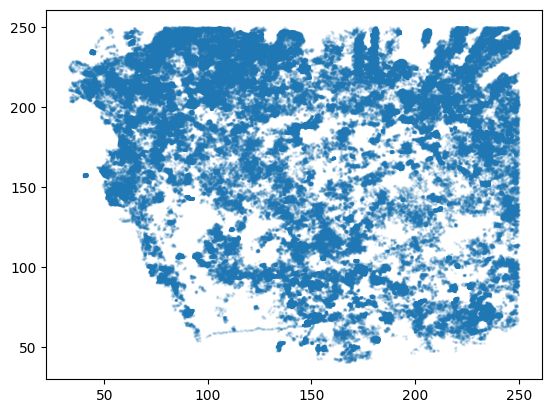

In [32]:
#Code to plot data in nm
plt.scatter(data[:,1], data[:,2], alpha = 0.1, s = 1)

In [35]:
np.max(data[:,3])

10000.0

In [ ]:
#Code for subsetting the data based on every other localization
# Split the data in half using slicing
data1 = data[::2]
data2 = data[1::2]

# Save the new arrays to separate files in the respective directory
os.makedirs('movie003', exist_ok=True)
np.savetxt('movie003/data1.csv', data1, delimiter=', ', header='Trajectory Index, X Position, Y Position', comments='')
np.savetxt('movie003/data2.csv', data2, delimiter=', ', header='Trajectory Index, X Position, Y Position', comments='')

Text(0.5, 1.0, 'Selected Trajectories')

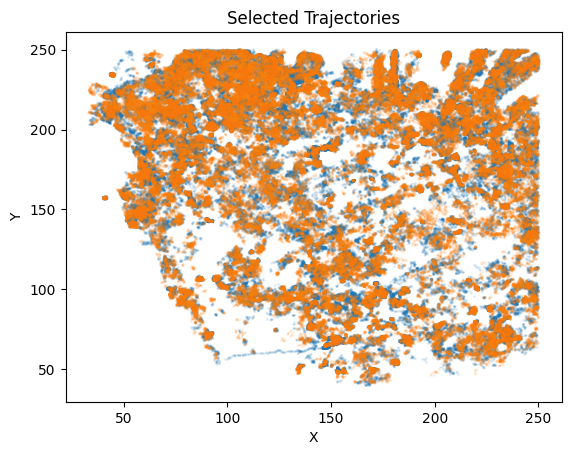

In [4]:
# Define the grid criteria
minX = -1
maxX = 1000
minY = -1
maxY = 1000

x_condition = (data[:, 1] >= minX) & (data[:, 1] <= maxX)
y_condition = (data[:, 2] >= minY) & (data[:, 2] <= maxY)

# Combine conditions with logical AND to get trajectories that meet both x and y criteria
selected_trajectory_indices = np.unique(data[np.all([x_condition, y_condition], axis=0)][:, 0])

# Randomly select half of the trajectories
np.random.shuffle(selected_trajectory_indices)

# Split the selected indices into two halves
half_length = len(selected_trajectory_indices) // 2
selected_trajectory_indices_1 = selected_trajectory_indices[:half_length]
selected_trajectory_indices_2 = selected_trajectory_indices[half_length:]

# Filter the entire trajectories based on selected indices for each half
selected_trajectories_1 = data[np.isin(data[:, 0], selected_trajectory_indices_1)]
selected_trajectories_2 = data[np.isin(data[:, 0], selected_trajectory_indices_2)]

# Save trajectories to two text files
#np.savetxt('selected_trajectories_1.txt', selected_trajectories_1, delimiter=', ', header='particle#, xPos, yPos')
#np.savetxt('selected_trajectories_2.txt', selected_trajectories_2, delimiter=', ', header='particle#, xPos, yPos')

# Plot the selected trajectories
plt.scatter(selected_trajectories_1[:, 1], selected_trajectories_1[:, 2], alpha = 0.1, s = 1)
plt.scatter(selected_trajectories_2[:, 1], selected_trajectories_2[:, 2], alpha = 0.1, s = 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Selected Trajectories')

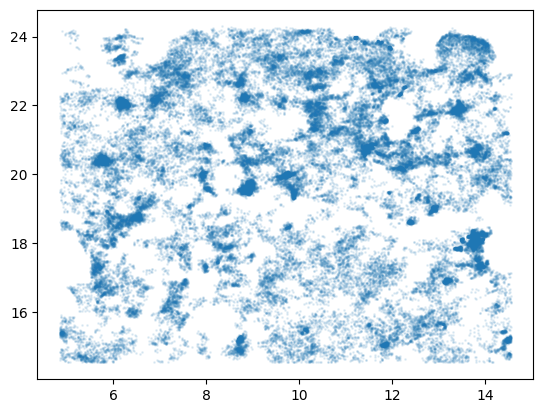

Text(0.5, 1.0, 'Selected Trajectories')

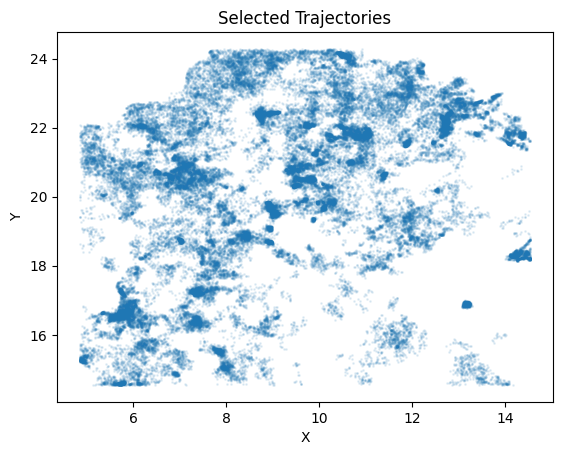

In [115]:
# Split the array into two halves
# Define the grid criteria
minX = 50
maxX = 150
minY = 150
maxY = 300

x_condition = (data[:, 1] >= minX) & (data[:, 1] <= maxX)
y_condition = (data[:, 2] >= minY) & (data[:, 2] <= maxY)

# Combine conditions with logical AND to get trajectories that meet both x and y criteria
selected_trajectories = data[x_condition & y_condition]

# Filter the entire trajectories based on selected indices for each time half

selected_trajectories_1 = selected_trajectories[selected_trajectories[:,3]<=3500][:,0:3]
selected_trajectories_2 = selected_trajectories[selected_trajectories[:,3]>3500][:,0:3]


# Save trajectories to two text files
np.savetxt('selected_trajectories_1.txt', selected_trajectories_1, delimiter=', ', header='particle#, xPos, yPos')
np.savetxt('selected_trajectories_2.txt', selected_trajectories_2, delimiter=', ', header='particle#, xPos, yPos')

# Plot the selected trajectories
plt.scatter(selected_trajectories_1[:, 1]*97/1e3, selected_trajectories_1[:, 2]*97/1e3, alpha = 0.1, s = 1)
plt.show()
plt.scatter(selected_trajectories_2[:, 1]*97/1e3, selected_trajectories_2[:, 2]*97/1e3, alpha = 0.1, s = 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Selected Trajectories')

In [105]:
selected_trajectories_1 = selected_trajectories[selected_trajectories[:,3]<=3500]
selected_trajectories_2 = selected_trajectories[selected_trajectories[:,3]>3500]

In [119]:
np.shape(selected_trajectories_2)

(83293, 3)

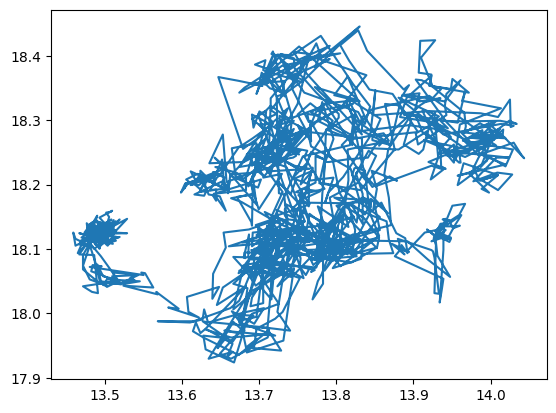

In [108]:
plt.plot(data[data[:,0]==1][:,1]*97/1000, data[data[:,0]==1][:,2]*97/1000)

In [109]:
np.shape(data[data[:,0]==1])

(1332, 4)

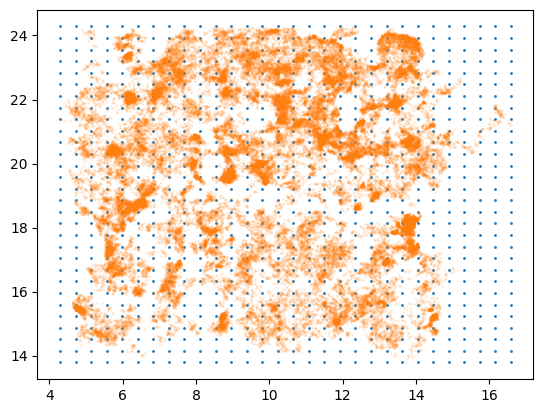

In [67]:
#define coordinates for Inducing points
xIndu = np.linspace(np.min(selected_trajectories_1[:, 1]*97/1e3), np.max(selected_trajectories_1[:, 1]*97/1e3), 30)
yIndu = np.linspace(np.min(selected_trajectories_1[:, 2]*97/1e3), np.max(selected_trajectories_1[:, 2]*97/1e3), 30)
xTemp, yTemp = np.meshgrid(xIndu, yIndu)
X = np.reshape(xTemp, -1)
Y = np.reshape(yTemp, -1)
induCoordinates = np.vstack((X, Y)).T
plt.scatter(induCoordinates[:,0], induCoordinates[:,1], s = 1)
plt.scatter(selected_trajectories_1[:, 1]*97/1e3, selected_trajectories_1[:, 2]*97/1e3, alpha = 0.1, s = 1)

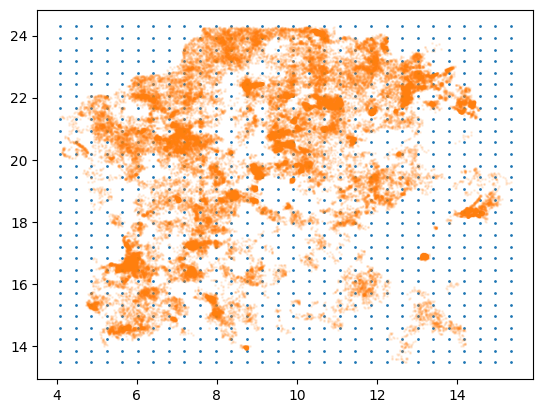

In [68]:
#define coordinates for Inducing points
xIndu = np.linspace(np.min(selected_trajectories_2[:, 1]*97/1e3), np.max(selected_trajectories_2[:, 1]*97/1e3), 30)
yIndu = np.linspace(np.min(selected_trajectories_2[:, 2]*97/1e3), np.max(selected_trajectories_2[:, 2]*97/1e3), 30)
xTemp, yTemp = np.meshgrid(xIndu, yIndu)
X = np.reshape(xTemp, -1)
Y = np.reshape(yTemp, -1)
induCoordinates = np.vstack((X, Y)).T
plt.scatter(induCoordinates[:,0], induCoordinates[:,1], s = 1)
plt.scatter(selected_trajectories_2[:, 1]*97/1e3, selected_trajectories_2[:, 2]*97/1e3, alpha = 0.1, s = 1)

In [10]:
selected_trajectories_2

array([], shape=(0, 3), dtype=float64)

In [8]:
selected_trajectory_indices

array([1.0000e+00, 2.0000e+00, 8.0000e+00, ..., 2.6309e+04, 2.6312e+04,
       2.6313e+04])

In [6]:
half_length

13862.0

Text(0.5, 1.0, 'Selected Trajectories')

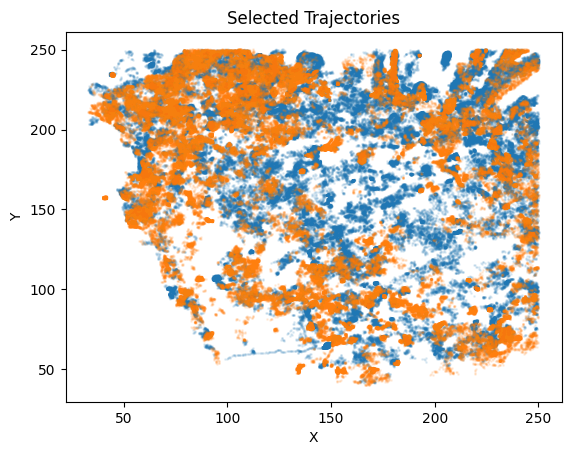

In [18]:
# Define the grid criteria
minX = -1
maxX = 1500
minY = -150
maxY = 2500

# Define the conditions
x_condition = (data[:, 1] >= minX) & (data[:, 1] <= maxX)
y_condition = (data[:, 2] >= minY) & (data[:, 2] <= maxY)

# Combine conditions with logical AND to get trajectories that meet both x and y criteria
selected_trajectory_indices = np.unique(data[np.all([x_condition, y_condition], axis=0)][:, 0])

# Create a mask to filter trajectories that meet all criteria
trajectory_mask = np.zeros(selected_trajectory_indices.shape[0], dtype=bool)

for idx, i in enumerate(selected_trajectory_indices):
    # Get the trajectory data
    trajectory_data = data[data[:, 0] == i][:, 1:3]  # Only X and Y coordinates
    
    # Check if all points in the trajectory meet the criteria
    meets_criteria = np.all((trajectory_data[:, 0] >= minX) &
                            (trajectory_data[:, 0] <= maxX) &
                            (trajectory_data[:, 1] >= minY) &
                            (trajectory_data[:, 1] <= maxY))
    
    trajectory_mask[idx] = meets_criteria

# Get the final trajectory indices
selected_trajectory_indices = selected_trajectory_indices[trajectory_mask]

# Split the selected indices into two halves
half_length = int(np.median(selected_trajectory_indices))
selected_trajectory_indices_1 = selected_trajectory_indices[selected_trajectory_indices<=half_length]
selected_trajectory_indices_2 = selected_trajectory_indices[selected_trajectory_indices>half_length]

# Filter the entire trajectories based on selected indices for each half
selected_trajectories_1 = data[np.isin(data[:, 0], selected_trajectory_indices_1)]
selected_trajectories_2 = data[np.isin(data[:, 0], selected_trajectory_indices_2)]

# Save trajectories to two text files
#np.savetxt('selected_trajectories_1.txt', selected_trajectories_1, delimiter=', ', header='particle#, xPos, yPos')
#np.savetxt('selected_trajectories_2.txt', selected_trajectories_2, delimiter=', ', header='particle#, xPos, yPos')

# Plot the selected trajectories
plt.scatter(selected_trajectories_1[:, 1], selected_trajectories_1[:, 2], alpha = 0.1, s = 1)
plt.scatter(selected_trajectories_2[:, 1], selected_trajectories_2[:, 2], alpha = 0.1, s = 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Selected Trajectories')

Text(0.5, 1.0, 'Selected Trajectories')

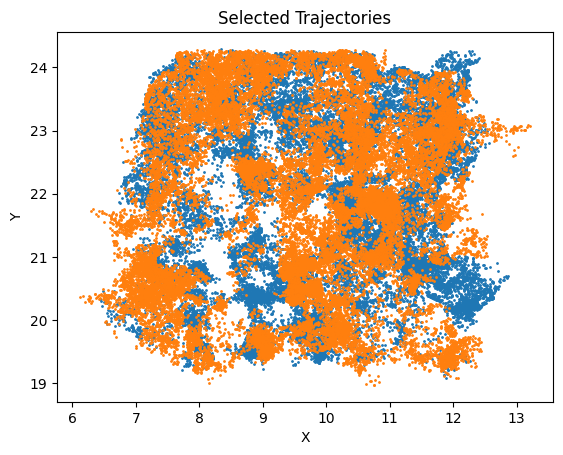

In [67]:
# Define the grid criteria
minX = 75
maxX = 125
minY = 200
maxY = 250

# Define the conditions
x_condition = (data[:, 1] >= minX) & (data[:, 1] <= maxX)
y_condition = (data[:, 2] >= minY) & (data[:, 2] <= maxY)

# Combine conditions with logical AND to get trajectories that meet both x and y criteria
selected_trajectory_indices = np.unique(data[np.all([x_condition, y_condition], axis=0)][:, 0])

# Create a mask to filter trajectories that meet all criteria
trajectory_mask = np.zeros(selected_trajectory_indices.shape[0], dtype=bool)

for idx, i in enumerate(selected_trajectory_indices):
    # Get the trajectory data
    trajectory_data = data[data[:, 0] == i][:, 1:3]  # Only X and Y coordinates
    
    # Check if all points in the trajectory meet the criteria
    meets_criteria = np.all((trajectory_data[:, 0] >= minX) &
                            (trajectory_data[:, 0] <= maxX) &
                            (trajectory_data[:, 1] >= minY) &
                            (trajectory_data[:, 1] <= maxY))
    
    trajectory_mask[idx] = meets_criteria

# Get the final trajectory indices
#selected_trajectory_indices = selected_trajectory_indices[trajectory_mask]

# Split the selected indices into two halves
half_length = int(np.median(selected_trajectory_indices))
selected_trajectory_indices_1 = selected_trajectory_indices[selected_trajectory_indices<=half_length]
selected_trajectory_indices_2 = selected_trajectory_indices[selected_trajectory_indices>half_length]

# Filter the entire trajectories based on selected indices for each half
selected_trajectories_1 = data[np.isin(data[:, 0], selected_trajectory_indices_1)]
selected_trajectories_2 = data[np.isin(data[:, 0], selected_trajectory_indices_2)]

# Save trajectories to two text files
#np.savetxt('selected_trajectories_1.txt', selected_trajectories_1, delimiter=', ', header='particle#, xPos, yPos')
#np.savetxt('selected_trajectories_2.txt', selected_trajectories_2, delimiter=', ', header='particle#, xPos, yPos')

# Plot the selected trajectories
plt.scatter(selected_trajectories_1[:, 1]*97/1e3, selected_trajectories_1[:, 2]*97/1e3, alpha = 1, s = 1)
plt.scatter(selected_trajectories_2[:, 1]*97/1e3, selected_trajectories_2[:, 2]*97/1e3, alpha = 1, s = 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Selected Trajectories')

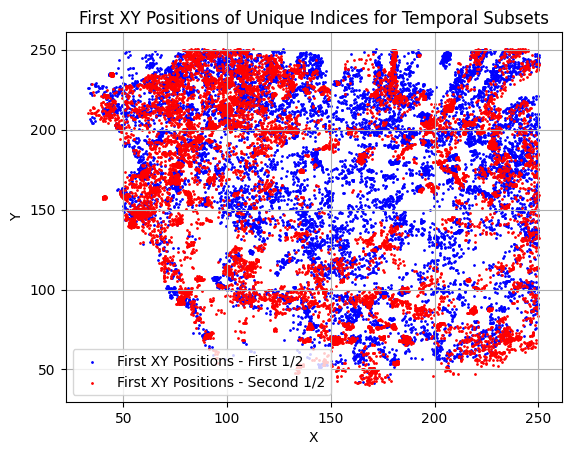

In [20]:
# Extract unique indices for both arrays
unique_indices_1 = np.unique(selected_trajectories_1[:, 0])
unique_indices_2 = np.unique(selected_trajectories_2[:, 0])

# Extract the first xy position for each unique index in selected_trajectories_1
first_xy_positions_1 = []
for index in unique_indices_1:
    first_xy_positions_1.append(selected_trajectories_1[selected_trajectories_1[:, 0] == index][0, 1:])

# Extract the first xy position for each unique index in selected_trajectories_2
first_xy_positions_2 = []
for index in unique_indices_2:
    first_xy_positions_2.append(selected_trajectories_2[selected_trajectories_2[:, 0] == index][0, 1:])

# Convert to NumPy arrays for easier manipulation
first_xy_positions_1 = np.array(first_xy_positions_1)
first_xy_positions_2 = np.array(first_xy_positions_2)

# Plot the first xy positions for both arrays
plt.scatter(first_xy_positions_1[:, 0], first_xy_positions_1[:, 1], color='blue', label='First XY Positions - First 1/2', s = 1)
plt.scatter(first_xy_positions_2[:, 0], first_xy_positions_2[:, 1], color='red', label='First XY Positions - Second 1/2', s = 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('First XY Positions of Unique Indices for Temporal Subsets')
plt.legend()
plt.grid(True)
plt.show()


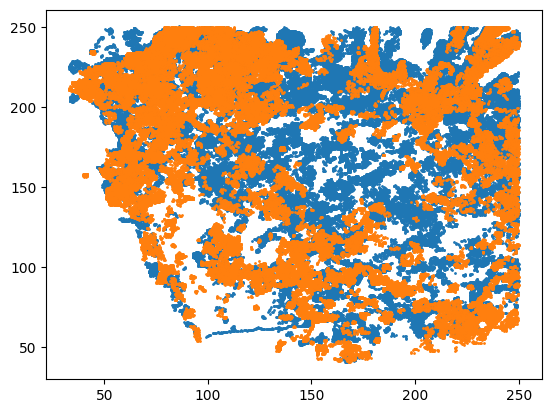

In [66]:
plt.scatter(data[data[:,3]<=3501][:,1], data[data[:,3]<=3501][:,2], s = 1)
plt.scatter(data[data[:,3]>3500][:,1], data[data[:,3]>3500][:,2], s = 1)

In [63]:
np.shape(data[data[:,3]>3500][:,1])

(217635,)

In [59]:
np.shape(data)[0]/2

233965.0